# 3.1 线性回归


介绍了线性模型、损失函数、优化策略、解析解（正规方程）、矢量化加速（矩阵相乘）、生物学神经单元传递

## 3.1.6. 练习
[答案](https://lxblog.com/qianwen/share?shareId=46d4a020-5313-49dc-b86a-84ca2fcc58a1)

# 3.2 从零实现线性回归

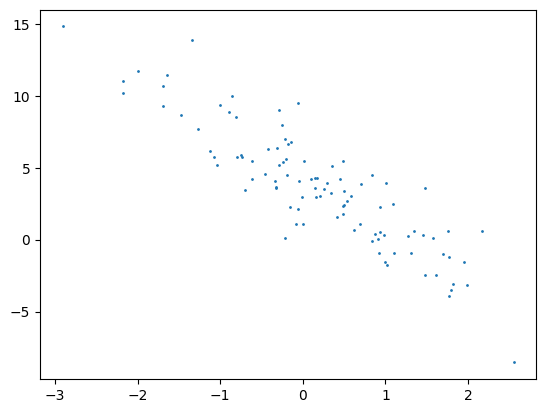

In [1]:
%matplotlib inline
import random
import torch
import matplotlib.pyplot as plt

# 生成数据
def init_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, w.shape[0]))
    y = torch.mm(x, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return x, y

w = torch.tensor([2.0, -3.4]).reshape(2, -1)
b = torch.tensor([4.2])
num_examples = 100

features, labels = init_data(w, b, num_examples)

plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [2]:
# 定义数据加载器
def data_iter(batch_size, features, labels):
    num_features = len(features)
    samper_indices = list(range(num_features))
    # 假设随机采样
    random.shuffle(samper_indices)

    for i in range(0, num_features, batch_size):
        batch_indices = torch.tensor(samper_indices[i:min(i+batch_size, num_features)])
        batch_feature = features[batch_indices]
        batch_lable = labels[batch_indices]
        yield batch_feature, batch_lable

batch_feature, batch_lable = next(data_iter(10, features, labels))

In [3]:
# 定义模型
def linear_model(w, b, x):
    return torch.matmul(x, w) + b

# 定义损失函数
def square_loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

# 定义优化器
def optimizer_sgd(param, lr, batch_size):
    with torch.no_grad():
        param -= lr * param.grad / batch_size
        param.grad.zero_()

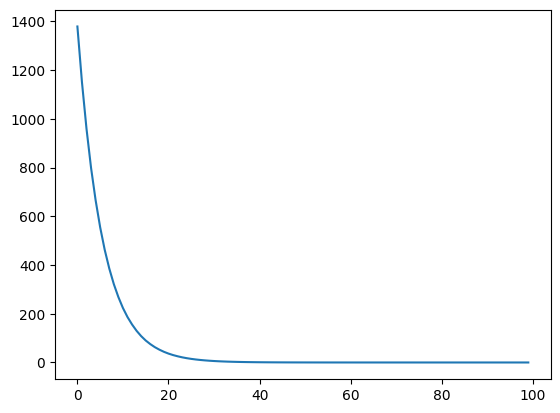

In [ ]:
# 超参数
batch_size = 10
lr = 0.01
epochs = 100

w = torch.normal(0, 0.01, (features.shape[1], 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

total_loss_list = []

for epoch in range(epochs):
    total_loss = 0.0
    for batch_feature, batch_lable in data_iter(batch_size, features, labels):
        y_hat = linear_model(w, b, batch_feature)
        l = square_loss(y_hat, batch_lable)
        l.sum().backward()
        optimizer_sgd(w, lr, batch_size)
        optimizer_sgd(b, lr, batch_size)

        total_loss += l.sum().item()
    total_loss_list.append(total_loss)
plt.plot(range(epochs), total_loss_list)

## 3.2.9 练习 
1. 如果我们将权重初始化为零，会发生什么。算法仍然有效吗？
    - 不仅仅初始化模型会失效，就是所有参数都初始化为相同的值都为失效。如果相同的值，样本输入后，输出一定是固定的，计算得到的梯度都是一样的相当于模型参数不会更新。这种现象被称为“对称性破坏”或“死节点”。因此，算法可能无法有效地学习到数据中的复杂模式。

2. 假设试图为电压和电流的关系建立一个模型。自动微分可以用来学习模型的参数吗?
    - 可以的，就是相当于学习电阻这个参数

3. 能基于普朗克定律使用光谱能量密度来确定物体的温度吗？
    - 可以吧，有公式就能推到参数

4. 计算二阶导数时可能会遇到什么问题？这些问题可以如何解决？
    - 计算二阶导数可能会遇到数值稳定性问题，尤其是在梯度消失或爆炸的情况下。这些问题可以通过正则化、梯度裁剪等方法来缓解。

5. 为什么在squared_loss函数中需要使用reshape函数？
    - 保证损失计算是一一对应的

6. 如果样本个数不能被批量大小整除，data_iter函数的行为会有什么变化？
    - 最后一个批次不固定大小呗

# 3.3 线性回归的简单实现

In [1]:
import torch
import torch.nn as nn
import torch.optim.optimizer as optimizer
import torch.utils
import torch.utils.data as data

# 生成数据
def init_data(w, b, num_examples):
    x = torch.normal(0, 1, (num_examples, w.shape[0]))
    y = torch.mm(x, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return x, y

def init_data_iter(dataset, batch_size, is_shuffle):
    dataset = data.TensorDataset(*dataset)

    return data.DataLoader(dataset, batch_size=batch_size, shuffle=is_shuffle)
w = torch.tensor([2.0, -3.4]).reshape(2, -1)
b = torch.tensor([4.2])
num_examples = 100

dataset = init_data(w, b, num_examples)
batch_size = 10
is_shuffle = True
data_iter = init_data_iter(dataset, batch_size, is_shuffle)

In [ ]:
# 定义模型
net = nn.Sequential(nn.Linear(2, 1))

# 参数初始化
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

# 定义loss
mse_loss = nn.MSELoss()
# 定义优化算法
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

# 开始训练
epochs = 10

for epoch in range(epochs):
    total_loss = 0.0
    for batch_feature, batch_lable in data_iter:
        y_hat = net(batch_feature)
        optimizer.zero_grad()
        l = mse_loss(batch_lable, y_hat)
        l.backward()
        optimizer.step()

        total_loss += l.item()
    print(total_loss)

tensor([[-4.6553,  5.4173]])
tensor([[-3.5361,  4.8282]])
tensor([[-7.6715, 14.0195]])
tensor([[-1.5402,  4.0579]])
tensor([[-6.8644,  2.2571]])
tensor([[2.2971, 2.6942]])
tensor([[-2.0509,  3.6641]])
tensor([[-8.2855,  8.0251]])
tensor([[-0.9867,  0.1246]])
tensor([[-0.9049,  0.4706]])
198.25868320465088
tensor([[0.2693, 4.2471]])
tensor([[-2.9512,  4.1350]])
tensor([[-3.4563,  2.5399]])
tensor([[-0.6709,  5.8148]])
tensor([[-0.2239,  1.4921]])
tensor([[-2.6468,  4.6942]])
tensor([[-4.6542,  1.3997]])
tensor([[-1.0392,  0.5426]])
tensor([[-1.0396,  0.7063]])
tensor([[-0.6767,  1.3644]])
61.02340221405029
tensor([[-0.5282,  1.5793]])
tensor([[-1.6996,  1.7254]])
tensor([[-0.4115,  0.4829]])
tensor([[-1.6235,  1.4108]])
tensor([[-1.2616,  2.0428]])
tensor([[-1.1557,  2.0224]])
tensor([[0.5594, 1.8214]])
tensor([[-1.8148,  2.1998]])
tensor([[-0.7146,  1.4005]])
tensor([[-0.0460,  1.2684]])
19.21458661556244
tensor([[0.1981, 0.7940]])
tensor([[-1.3462,  1.2859]])
tensor([[-0.5697,  1.1207

## 3.3.9 练习
1. 如果将小批量的总损失替换为小批量损失的平均值，需要如何更改学习率？
    - 把损失从总和（sum）变为平均（mean），每个样本的梯度会被缩小，所以如果你保持原来的学习率，参数更新也会变小，训练会变慢，这时候学习率应该相应增加
    - 一直用 mean是PyTorch默认行为
2. 查看深度学习框架文档，它们提供了哪些损失函数和初始化方法？用Huber损失代替原损失
    - pytorch中常用的损失函数，通过[损失函数官方文档介绍](https://pytorch.org/docs/stable/nn.html#loss-functions)可以查看
3. 如何访问线性回归的梯度？
    - print(net[0].weight.grad)

# 3.4 softmax回归
讲解的是分类问题
1. 什么是分类问题，简单来说就是预测样本属于哪个类别
2. 网络架构，最后的全连接层为p * q的，其中q是分类类别
3. softmax函数
    - 作用就是把最后全连接层输出结果进行归一化，总和为1，数值在0到1之间
    - 公式：
    $$ \text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^n e^{z_j}} $$
    - 其中，$ z_i $ 是输入向量的第 $ i $ 个元素，$ n $ 是输入向量的总维度。
    - 取概率最大作为预测类别
4. softmax批量计算
    - 为了加快计算效率，通常会批量计算的，输出为X（n*p）,全连接层（p*q）输出O，经过softmax层，输出为Y（n*q）
5. 损失函数
    - 对数似然：可以认为对给定任意输入x的每个类的条件概率，要做的就是最大化所有样本的连乘条件概率，根据最大化似然函数，变为求负对数似然
    - softmax求导、交叉熵求导、交叉熵损失函数求导：参考[softmax等求导](https://www.cnblogs.com/wuliytTaotao/p/10787510.html)
6. 信息论基础
    - 香农的信息论究竟牛在哪里？ - Hao Bai的回答 - 知乎 https://www.zhihu.com/question/27068465/answer/2517655344


# 3.5 图像分类数据集 

In [16]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms


# 读取数据集并转化
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root='E:\Personal-Knowledge-Base\Data\Deep-Learning\data',
                                                  train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root='E:\Personal-Knowledge-Base\Data\Deep-Learning\data',
                                                train=False, transform=trans, download=True)

In [18]:
len(mnist_train), len(mnist_test)
mnist_train[0][0].shape

torch.Size([1, 28, 28])

array([<Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'dress'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'pullover'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 't-shirt'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sandal'}>,
       <Axes: title={'center': 'sneaker'}>,
       <Axes: title={'center': 'ankle boot'}>,
       <Axes: title={'center': 'trouser'}>,
       <Axes: title={'center': 't-shirt'}>], dtype=object)

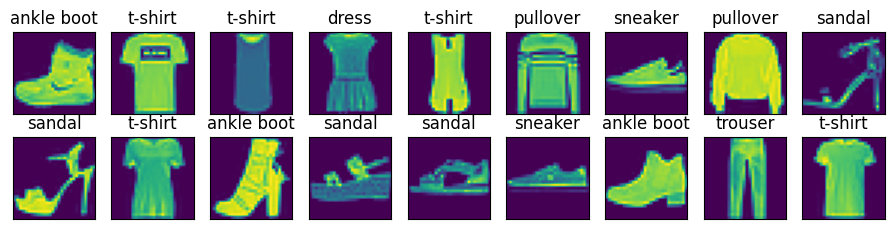

In [20]:
import matplotlib.pyplot as plt
# 获取标签
def get_fashion_mnist_lables(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

def show_img(imgs, num_rols, num_cols, titles=None, scale=1.5):
    figsize = (num_cols * scale, num_rols * scale)
    _, axes = plt.subplots(num_rols, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes


X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_img(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_lables(y), scale=1.25)

In [ ]:
import time
batch_size = 256

def get_dataloader_workers():  #@save
    """使用4个进程来读取数据"""
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())
start = time.time()

X, y = next(iter(train_iter))
end = time.time()
print(f"耗时{end - start}s")


def load_data_fashion_mnist(batch_size, resize=None):  #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="E:\Personal-Knowledge-Base\Data\Deep-Learning\data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="E:\Personal-Knowledge-Base\Data\Deep-Learning\data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))


# 3.6 从零开始实现softmax函数

In [5]:
import torch 
from IPython import display
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

# 加载数据dataloader
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)

# 初始化模型参数
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 9824620.67it/s] 


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 118994.52it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2240018.80it/s]


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 2569591.45it/s]

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [6]:
# 定义softmax函数
def softmax(X):
    exp_x = torch.exp(X)
    sum_x = torch.sum(exp_x, dim=1, keepdim=True)
    return exp_x / sum_x

softmax_test_x = torch.rand((3, 4))
softmax_x = softmax(softmax_test_x)
print(softmax_x.sum(1, keepdim=True))
softmax_x

tensor([[1.0000],
        [1.0000],
        [1.0000]])


tensor([[0.2936, 0.2274, 0.2869, 0.1921],
        [0.2153, 0.2365, 0.1943, 0.3539],
        [0.3204, 0.3167, 0.1511, 0.2118]])

In [7]:
# 定义模型
def net(X):
    return softmax(torch.matmul(X.reshape(-1, W.shape[0]), W) + b)

# 定义损失函数
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[range(len(y)), y])

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0,1], y]

l = cross_entropy(y_hat, y)
print(l)
net_is_module = isinstance(net, torch.nn.Module)
net_is_module

tensor([2.3026, 0.6931])


False

In [8]:
# 定义分类精度
def accuracy(y_hat, y):
    if (len(y_hat.shape) > 1) and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(dim=1)
    cmp = y_hat.type(y.dtype) == y # cmp=tensor([False,  True])
    return float(cmp.type(y.dtype).sum())

accuracy_score = accuracy(y_hat, y) / len(y)
accuracy_score

0.5

In [9]:
# 模型评估
class Accumulator:
    def __init__(self, n):
        self.data = [0.0] * n
    
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    
    def reset(self):
        self.data = [0.0] * self.data
    
    def __getitem__(self, idx):
        return self.data[idx]
    
def evaluate_accuracy(net, data_iter):
    if isinstance(net, torch.nn.Module):
        net.eval()
    metrics = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metrics.add(accuracy(net(X), y), y.numel())
    
    return metrics[0] / metrics [1]


In [10]:
# 模型训练
def train_epoch_ch3(net, train_iter, loss, updater):
    if isinstance(net, torch.nn.Module):
        net.train()
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            updater.zero_grad()
            l.mean().backword()
            updater.step()  
        else:
            l.sum().backward()
            updater(X.shape[0])

        metric.add(l.sum().item(), accuracy(y_hat, y), y.numel())
        # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]            


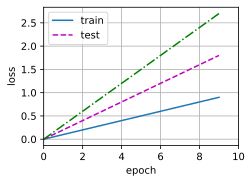

In [12]:
import matplotlib.pyplot as plt
from IPython import display

class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

animator = Animator(xlabel='epoch', ylabel='loss', legend=['train', 'test'], xlim=[0, 10])
for epoch in range(10):
    animator.add(epoch, (epoch * 0.1, epoch * 0.2, epoch * 0.3))

0.8311


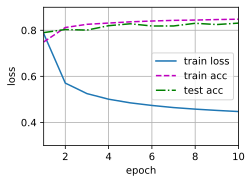

In [13]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs,  updater):
    animator = Animator(xlabel='epoch', ylabel='loss', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
        print(test_acc)
    train_loss, train_acc = train_metrics

    # assert train_loss < 0.5, train_loss
    # assert train_acc <= 1 and train_acc > 0.7, train_acc
    # assert test_acc <= 1 and test_acc > 0.7, test_acc

lr = 0.1
lr = 0.1

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

num_epochs= 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

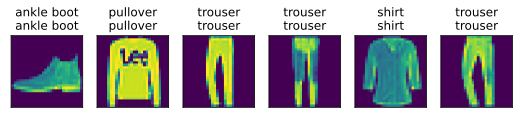

In [14]:
# 进行评估
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

# 代码流程
- 准备训练集和测试集、准备模型参数
- 构建模型包括softmax和定义net
- 计算损失，手动实现交叉熵损失
- 定义评估函数evaluate_accuracy，定义了Accumulator来存储分类精度
- 定义单次训练包输入包括net、训练集、损失、优化器
- 执行多轮训练，并动态开始化展示损失降低

## 3.6.9. 练习
1. 本节直接实现了基于数学定义softmax运算的softmax函数。这可能会导致什么问题？提示：尝试计算exp(50)的大小。
    - 可能会导致数值不稳定的问题，
    - 输入到exp的值很大会导致输出值也很大，可能超出浮点数上限
    - 输入值很小，会导致输出值很小，分母可能接近为0，导致数值下溢问题
    - 即使没有发生溢出或下溢，由于指数运算的结果范围可能差异巨大，分子和分母之间的相对比例可能导致精度损失
    - 解决方法就是输入值都减去输入向量中一个最大值,优点是：a.在计算exp()是输出值都在\[0,1\]之间,避免数值溢出；b.相当于计算softmax函数分子分母同时除exp(max)，不会改变原始数据结果

2. 本节中的函数cross_entropy是根据交叉熵损失函数的定义实现的。它可能有什么问题？提示：考虑对数的定义域
    - 如果-log(x)中x为0或者接近于0，那么损失就成了无穷大了，所以一般添加一个极小的平滑项，如1e-8

3. 返回概率最大的分类标签总是最优解吗？例如，医疗诊断场景下可以这样做吗？
    - 肯定不是的，医学诊断会考虑前几个可能得病症，要不然可能就误诊断；其它场景如土地利用分类，需要识别一个地块混合土地利用分类则不行

4. 假设我们使用softmax回归来预测下一个单词，可选取的单词数目过多可能会带来哪些问题?
    - 计算复杂度高。softmax计算涉及对所有可能的类别的指数运算和归一化操作。如果词汇表数量过大，每个词的计算都会所有词的求和
    - 内存占用大，softmax输入经过H * V的线性层，当V很大，那么内存占用就会很高
    - 数值不稳定，虽然通过减去输入向量最大值会让exp输出在\[0,1\]，但是如果V太多，求和也是不小的数值。这样，分子和分母差距过大
    - 数据稀疏性问题，大规模词汇表中，许多单词可能是低频词或罕见词。这些单词在训练数据中的出现次数较少，导致模型难以学习到它们的有效表示
    - 训练效率低下，当词汇表很大时，每个训练样本的目标标签是一个 one-hot 向量，其长度等于词汇表大小。大部分元素为 0，只有对应目标单词的位置为 1。这种稀疏性使得每次训练只能更新一小部分权重，导致训练效率低下。

# 3.7. softmax回归的简洁实现

In [20]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

# 重新定义损失
loss = torch.nn.CrossEntropyLoss(reduction='None')

# 重新定义优化器
trainer = torch.optim.SGD(net.parameters(), lr=0.1)


ValueError: None is not a valid value for reduction

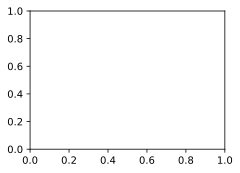

In [21]:
num_epochs = 10

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)